In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
#!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [1]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [ ]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple wordclound -t /home/aistudio/external-libraries

In [ ]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pyecharts -t /home/aistudio/external-libraries
!pip install echarts-countries-pypkg -t /home/aistudio/external-libraries
!pip install echarts-china-provinces-pypkg -t /home/aistudio/external-libraries
!pip install echarts-china-cities-pypkg -t /home/aistudio/external-libraries
!pip install echarts-countries-pypkg -t /home/aistudio/external-libraries

In [ ]:
!tar -Jxf /home/aistudio/node-v12.16.3-linux-x64.tar.xz

In [ ]:
!pip install --upgrade pyLDAvis

In [ ]:
!pip install --upgrade pyecharts

In [2]:
import csv
import pandas as pd
import chardet
import jieba
import wordcloud
from PIL import Image
from jieba import analyse
import numpy as np
from pyecharts.charts import Pie
import pyecharts.options as opts
from pyecharts.charts import Map
import matplotlib.pyplot as plt
%matplotlib inline
#from pyecharts.globals import CurrentConfig, NotebookType
# CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
#CurrentConfig.ONLINE_HOST = "pyecharts-assets/assets"

In [ ]:
# 获取文件编码类型
def get_encode(file):
    # 二进制方式读取，获取字节数据，检测类型
    with open(file, 'rb') as f:
        return chardet.detect(f.read())['encoding']


In [ ]:
data_path='data/data31204/week1.csv'
df = pd.DataFrame()
encode = get_encode(data_path) # get_encode函数在上文
f = open(data_path, encoding=encode,errors='ignore')
data = pd.read_csv(f,dtype=str)
df = df.append(data)
df

,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied
0,mCClUNCqwe,mU5j0dIAkQ,uK3RXUJ0V,NaN,新浪微博,0,转发微博,NaN,2012-01-03 02:02:27,NaN,NaN
1,mRsOcOLTlc,mJGNX5nAmo,uK3RXUJ0V,NaN,新浪微博,0,!!!!!!!!!@uK3RXUYW3： //@u0AGMTTVD： ！！！！！！！！,NaN,2012-01-03 01:17:39,NaN,NaN
2,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利!!!,NaN,2012-01-03 01:15:36,NaN,NaN
3,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要><@uK3RXUYW3： //@ukn： 全都想要啊QAQ,NaN,2012-01-03 01:12:55,NaN,NaN
4,mQkLJSl8bf,muy8VxftBB,uK3RXUJ0V,NaN,新浪微博,0,//@ukn： //@uMLLV3ZCO： 转发微博,NaN,2012-01-03 01:10:42,NaN,NaN
5,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,//@ukn： //@ukn： 吐槽点太多- -//@ukn： 竟然没被吐槽//@uk...,NaN,2012-01-03 01:09:54,NaN,NaN
6,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家~@uK3RXUYW3： @ukn： @ukn： @uQSMQTGXO： @...,NaN,2012-01-03 01:08:45,NaN,NaN
7,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了xdd,NaN,2012-01-03 00:54:07,NaN,NaN
8,mCVHzsScoY,m7nJ3YBbyo,uK3RXUJ0V,NaN,新浪微博,0,哈哈哈,NaN,2012-01-03 00:51:52,NaN,NaN
9,mdO3bmDotD,mqUTC9xyyM,uK3RXUJ0V,NaN,新浪微博,0,@uK3RXUYW3： //@ukn： //@ukn： [可怜][可怜],NaN,2012-01-03 00:44:08,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790108 entries, 0 to 4790107
Data columns (total 11 columns):
mid                     object
retweeted_status_mid    object
uid                     object
retweeted_uid           object
source                  object
image                   object
text                    object
geo                     object
created_at              object
deleted_last_seen       object
permission_denied       object
dtypes: object(11)
memory usage: 402.0+ MB


In [ ]:
df.isnull().sum()

mid                           0
retweeted_status_mid    1619152
uid                           0
retweeted_uid           4608000
source                       52
image                         0
text                         70
geo                     4768168
created_at                    0
deleted_last_seen       4770468
permission_denied       4790099
dtype: int64

In [ ]:
df.text.replace(r'\[.*?\]','',regex=True,inplace=True)

In [ ]:
df.text.replace(r'转发微博','',regex=True,inplace=True)
df.text.replace(r'轉發微博','',regex=True,inplace=True)
df.text.replace(r'微博','',regex=True,inplace=True)
df.text.replace(r'回复','',regex=True,inplace=True)
df.text.replace(r'转发','',regex=True,inplace=True)
df.text.replace(r'哈*','',regex=True,inplace=True)
df.text.replace(r'啊*','',regex=True,inplace=True)
df['text']=df['text'].str.replace(r'[^\u4e00-\u9fa5]','')
df

,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied
0,mCClUNCqwe,mU5j0dIAkQ,uK3RXUJ0V,NaN,新浪微博,0,,NaN,2012-01-03 02:02:27,NaN,NaN
1,mRsOcOLTlc,mJGNX5nAmo,uK3RXUJ0V,NaN,新浪微博,0,,NaN,2012-01-03 01:17:39,NaN,NaN
2,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利,NaN,2012-01-03 01:15:36,NaN,NaN
3,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要全都想要,NaN,2012-01-03 01:12:55,NaN,NaN
4,mQkLJSl8bf,muy8VxftBB,uK3RXUJ0V,NaN,新浪微博,0,,NaN,2012-01-03 01:10:42,NaN,NaN
5,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,吐槽点太多竟然没被吐槽而且竟然没有人吐槽他,NaN,2012-01-03 01:09:54,NaN,NaN
6,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家,NaN,2012-01-03 01:08:45,NaN,NaN
7,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了,NaN,2012-01-03 00:54:07,NaN,NaN
8,mCVHzsScoY,m7nJ3YBbyo,uK3RXUJ0V,NaN,新浪微博,0,,NaN,2012-01-03 00:51:52,NaN,NaN
9,mdO3bmDotD,mqUTC9xyyM,uK3RXUJ0V,NaN,新浪微博,0,,NaN,2012-01-03 00:44:08,NaN,NaN


In [ ]:
df.to_csv('df.csv')

In [ ]:
df=pd.read_csv('df.csv',index_col=0)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
def cut_words(a):
    seg=jieba.cut(a)
    return ' '.join(seg)
df.text=df.text.astype(str)
df.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
df

,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied
0,mCClUNCqwe,mU5j0dIAkQ,uK3RXUJ0V,NaN,新浪微博,0,nan,NaN,2012-01-03 02:02:27,NaN,NaN
1,mRsOcOLTlc,mJGNX5nAmo,uK3RXUJ0V,NaN,新浪微博,0,nan,NaN,2012-01-03 01:17:39,NaN,NaN
2,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利,NaN,2012-01-03 01:15:36,NaN,NaN
3,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要全都想要,NaN,2012-01-03 01:12:55,NaN,NaN
4,mQkLJSl8bf,muy8VxftBB,uK3RXUJ0V,NaN,新浪微博,0,nan,NaN,2012-01-03 01:10:42,NaN,NaN
5,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,吐槽点太多竟然没被吐槽而且竟然没有人吐槽他,NaN,2012-01-03 01:09:54,NaN,NaN
6,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家,NaN,2012-01-03 01:08:45,NaN,NaN
7,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了,NaN,2012-01-03 00:54:07,NaN,NaN
8,mCVHzsScoY,m7nJ3YBbyo,uK3RXUJ0V,NaN,新浪微博,0,nan,NaN,2012-01-03 00:51:52,NaN,NaN
9,mdO3bmDotD,mqUTC9xyyM,uK3RXUJ0V,NaN,新浪微博,0,nan,NaN,2012-01-03 00:44:08,NaN,NaN


In [ ]:
df.dropna(subset=['text'],axis=0,how='any',inplace=True)
df

,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied
2,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利,NaN,2012-01-03 01:15:36,NaN,NaN
3,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要全都想要,NaN,2012-01-03 01:12:55,NaN,NaN
5,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,吐槽点太多竟然没被吐槽而且竟然没有人吐槽他,NaN,2012-01-03 01:09:54,NaN,NaN
6,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家,NaN,2012-01-03 01:08:45,NaN,NaN
7,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了,NaN,2012-01-03 00:54:07,NaN,NaN
10,mu9iEJwbEt,mPoMqa8zoK,uK3RXUJ0V,NaN,新浪微博,0,太萌了边叠衣服边味覚也太萌了,NaN,2012-01-03 00:38:10,NaN,NaN
12,m3zb0aii82,mSazECdURr,uK3RXUJ0V,NaN,新浪微博,0,霸气噗好霸气明天真的满满,NaN,2012-01-02 22:58:52,NaN,NaN
13,m2X81ImxzY,m9hq3KZgSv,uK3RXUJ0V,NaN,新浪微博,0,利达从头到尾都很紧张的样子让看着的我都担心起来除了要好好的完成自己的任务有时候还要替歌手的讲...,NaN,2012-01-02 22:51:06,NaN,NaN
15,mkTNeH9MoL,mBcY0O532e,uK3RXUJ0V,NaN,新浪微博,0,美帅,NaN,2012-01-02 20:46:42,NaN,NaN
16,mF8MzSG9OE,mgYszKvajx,uK3RXUJ0V,NaN,新浪微博,0,年末真好看,NaN,2012-01-02 20:43:18,NaN,NaN


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied
0,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利,NaN,2012-01-03 01:15:36,NaN,NaN
1,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要全都想要,NaN,2012-01-03 01:12:55,NaN,NaN
2,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,吐槽点太多竟然没被吐槽而且竟然没有人吐槽他,NaN,2012-01-03 01:09:54,NaN,NaN
3,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家,NaN,2012-01-03 01:08:45,NaN,NaN
4,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了,NaN,2012-01-03 00:54:07,NaN,NaN
5,mu9iEJwbEt,mPoMqa8zoK,uK3RXUJ0V,NaN,新浪微博,0,太萌了边叠衣服边味覚也太萌了,NaN,2012-01-03 00:38:10,NaN,NaN
6,m3zb0aii82,mSazECdURr,uK3RXUJ0V,NaN,新浪微博,0,霸气噗好霸气明天真的满满,NaN,2012-01-02 22:58:52,NaN,NaN
7,m2X81ImxzY,m9hq3KZgSv,uK3RXUJ0V,NaN,新浪微博,0,利达从头到尾都很紧张的样子让看着的我都担心起来除了要好好的完成自己的任务有时候还要替歌手的讲...,NaN,2012-01-02 22:51:06,NaN,NaN
8,mkTNeH9MoL,mBcY0O532e,uK3RXUJ0V,NaN,新浪微博,0,美帅,NaN,2012-01-02 20:46:42,NaN,NaN
9,mF8MzSG9OE,mgYszKvajx,uK3RXUJ0V,NaN,新浪微博,0,年末真好看,NaN,2012-01-02 20:43:18,NaN,NaN


In [ ]:
df['seg_words']=df['text'].apply(cut_words) 
df

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.841 seconds.
Prefix dict has been built successfully.


,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied,seg_words
0,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利,NaN,2012-01-03 01:15:36,NaN,NaN,求 一切 順利
1,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要全都想要,NaN,2012-01-03 01:12:55,NaN,NaN,想要 全都 想要
2,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,吐槽点太多竟然没被吐槽而且竟然没有人吐槽他,NaN,2012-01-03 01:09:54,NaN,NaN,吐槽 点太多 竟然 没 被 吐 槽 而且 竟然 没有 人吐槽 他
3,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家,NaN,2012-01-03 01:08:45,NaN,NaN,係 時侯 迫害 下 大家
4,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了,NaN,2012-01-03 00:54:07,NaN,NaN,他 又 抽 了
5,mu9iEJwbEt,mPoMqa8zoK,uK3RXUJ0V,NaN,新浪微博,0,太萌了边叠衣服边味覚也太萌了,NaN,2012-01-03 00:38:10,NaN,NaN,太萌 了 边 叠 衣服 边 味 覚 也 太 萌 了
6,m3zb0aii82,mSazECdURr,uK3RXUJ0V,NaN,新浪微博,0,霸气噗好霸气明天真的满满,NaN,2012-01-02 22:58:52,NaN,NaN,霸气 噗 好 霸气 明天 真的 满满
7,m2X81ImxzY,m9hq3KZgSv,uK3RXUJ0V,NaN,新浪微博,0,利达从头到尾都很紧张的样子让看着的我都担心起来除了要好好的完成自己的任务有时候还要替歌手的讲...,NaN,2012-01-02 22:51:06,NaN,NaN,利达 从头到尾 都 很 紧张 的 样子 让 看着 的 我 都 担心 起来 除了 要 好好 的...
8,mkTNeH9MoL,mBcY0O532e,uK3RXUJ0V,NaN,新浪微博,0,美帅,NaN,2012-01-02 20:46:42,NaN,NaN,美帅
9,mF8MzSG9OE,mgYszKvajx,uK3RXUJ0V,NaN,新浪微博,0,年末真好看,NaN,2012-01-02 20:43:18,NaN,NaN,年末 真 好看


In [ ]:
df.to_csv("a.csv")

In [3]:
df=pd.read_csv('a.csv',index_col=0)
df

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied,seg_words
0,mH44qG6iUm,mH44qL9LlF,uK3RXUJ0V,NaN,新浪微博,0,求一切順利,NaN,2012-01-03 01:15:36,NaN,NaN,求 一切 順利
1,mZmwFtOdVX,mcyE5GR7GJ,uK3RXUJ0V,NaN,新浪微博,0,想要全都想要,NaN,2012-01-03 01:12:55,NaN,NaN,想要 全都 想要
2,mnzrsoGWNN,mNfGcUeZbK,uK3RXUJ0V,NaN,新浪微博,0,吐槽点太多竟然没被吐槽而且竟然没有人吐槽他,NaN,2012-01-03 01:09:54,NaN,NaN,吐槽 点太多 竟然 没 被 吐 槽 而且 竟然 没有 人吐槽 他
3,m2rVkbmLsg,m7nJhJ3W6z,uK3RXUJ0V,NaN,新浪微博,0,係時侯迫害下大家,NaN,2012-01-03 01:08:45,NaN,NaN,係 時侯 迫害 下 大家
4,mNfG6Xsbx5,mex2cwWppM,uK3RXUJ0V,NaN,新浪微博,0,他又抽了,NaN,2012-01-03 00:54:07,NaN,NaN,他 又 抽 了
5,mu9iEJwbEt,mPoMqa8zoK,uK3RXUJ0V,NaN,新浪微博,0,太萌了边叠衣服边味覚也太萌了,NaN,2012-01-03 00:38:10,NaN,NaN,太萌 了 边 叠 衣服 边 味 覚 也 太 萌 了
6,m3zb0aii82,mSazECdURr,uK3RXUJ0V,NaN,新浪微博,0,霸气噗好霸气明天真的满满,NaN,2012-01-02 22:58:52,NaN,NaN,霸气 噗 好 霸气 明天 真的 满满
7,m2X81ImxzY,m9hq3KZgSv,uK3RXUJ0V,NaN,新浪微博,0,利达从头到尾都很紧张的样子让看着的我都担心起来除了要好好的完成自己的任务有时候还要替歌手的讲...,NaN,2012-01-02 22:51:06,NaN,NaN,利达 从头到尾 都 很 紧张 的 样子 让 看着 的 我 都 担心 起来 除了 要 好好 的...
8,mkTNeH9MoL,mBcY0O532e,uK3RXUJ0V,NaN,新浪微博,0,美帅,NaN,2012-01-02 20:46:42,NaN,NaN,美帅
9,mF8MzSG9OE,mgYszKvajx,uK3RXUJ0V,NaN,新浪微博,0,年末真好看,NaN,2012-01-02 20:43:18,NaN,NaN,年末 真 好看


In [4]:
#文本向量化
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [5]:
stopword="stopwords.txt"
with open(stopword,'rb') as f:
    stopwords=f.read().decode('utf-8') #停用词提取
stoplist=stopwords.splitlines()

In [6]:
n_features=1000
tf_vectorizer=TfidfVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words=stoplist,
                                max_df=0.5,
                                min_df=10)
tf=tf_vectorizer.fit_transform(df.seg_words)
#Fit_transform学习到一个字典，并返回Document-term的矩阵(即词典中的词在该文档中出现的频次)
#Fit步骤学习idf vector，一个全局的词权重_idf_diag。输入的X是一个稀疏矩阵，行是样本数，列是特征数。
#Transform步骤是把X这个计数矩阵转换成tf-idf表示， X = X * self._idf_diag，然后进行归一化

tf.shape

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2c', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'iii', 'isn', 'lex', 'li', 'll', 'mon', 'ng昉', 'null', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'zxfitl'] not in stop_words.
  sorted(inconsistent))


(3777777, 1000)

In [7]:
from sklearn.externals import joblib
import pickle
tf_ModelPath='model/tf_model.pkl'
feature_path='feature/feature.pkl'
joblib.dump(tf_vectorizer,tf_ModelPath )
with open(feature_path, 'wb') as fw:
    pickle.dump(tf_vectorizer.vocabulary_, fw)

In [ ]:
from sklearn.externals import joblib

In [11]:
# #得到存储的tf_vectorizer,节省预处理时间
from sklearn.externals import joblib
tf_ModelPath='model/tf_model.pkl'
tf_vectorizer = joblib.load(tf_ModelPath)
tf = tf_vectorizer.transform(df.seg_words)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2c', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'iii', 'isn', 'lex', 'li', 'll', 'mon', 'ng昉', 'null', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'zxfitl'] not in stop_words.
  sorted(inconsistent))


In [12]:
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
n_topics=30
lda=LatentDirichletAllocation(n_topics=n_topics,
                                #learning_method='batch',
                                learning_method='online',
                                max_iter=20,
                                learning_offset=50.,
                                random_state=0,
                                batch_size=128,
                                verbose=1)

In [ ]:
lda.fit(tf)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=30, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [ ]:
joblib.dump(lda,"model/lda_model.pkl")

['model/lda_model.pkl']

In [6]:
lda=joblib.load("model/lda_model.pkl")

In [7]:

def print_topic(model,feature_names,n_top_words):
    for idx,topic in enumerate(model.components_):
        if(idx<10):
            print("Topic{}".format(idx))
            print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]))
        else:
            break
    print()


In [8]:
n_top_words=20
tf_feature_names=tf_vectorizer.get_feature_names()
print_topic(lda,tf_feature_names,n_top_words)

Topic0
关注 电影 快乐 两个 经典 一個 精彩 评论 懂得 明星 直播 事件 调查 专业 放在 性感 一段 最美 一部 一名
Topic1
上海 今日 我要 微笑 节目 真实 家里 话题 答应 数据 神奇 放假 估计 礼物 眼泪 有奖 覺得 全世界 失望 悲伤
Topic2
爱情 悄悄 国家 冬天 年月日 早安 搭配 心理 女性 年轻 趣味 减肥 理解 不行 生日快乐 身上 送给 分手 蛋糕 其實
Topic3
活动 祝福 心愿 一年 感谢 一家 机会 参加 游戏 粉丝 享受 一张 好友 即可 结束 提供 休息 元旦 博文 目标
Topic4
健康 晚安 早就 童鞋 不到 睡觉 最终 越来越 考试 收藏 日子 一份 报道 学校 速度 尼玛 收到 平安 瞬间 回答
Topic5
香港 美国 全球 喜歡 南京 什麼 下次 時候 雖然 标准 时光 人才 時間 合作 已經 那麼 公开 沒有 干嘛 武汉
Topic6
女人 人生 成功 定义 设计 适合 不用 放弃 神马 寻找 坤哥 用户 记住 路上 心灵 烦恼 风景 国内 欢乐 便宜
Topic7
地址 投票 参与 领导 价值 春节 一辈子 痛苦 霸气 小心 心中 提高 十大 投给 发起 表态 选项 一只 自我 周末
Topic8
回家 手机 恭喜 名字 全国 品牌 免费 刚刚 宝贝 家人 有个 勋章 所有人 链接 杭州 小孩 介绍 口味 带上 干净
Topic9
珍惜 离开 效果 這個 阳光 精神 保护 大学 更好 伤害 三个 坚强 青春 长途旅行 還是 系列 解决 甜蜜 二次元 起來



In [9]:
import pyLDAvis
import pyLDAvis.sklearn

In [13]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
data=pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)


/home/aistudio/external-libraries/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [14]:
pyLDAvis.save_html(data,'lda.html')

In [3]:
user_df=pd.read_csv('data/data31204/userdata.csv')
user_df

,uid,province,gender,verified
0,uCXZAHQXC,11,m,False
1,uUPCCYCXC,11,f,False
2,u351ODTXW,11,f,False
3,uG1K5KFX5,11,m,False
4,u0VNQ2GX5,11,f,False
5,uMMS2XZXQ,11,m,False
6,uBKZLVTXQ,11,m,False
7,uZXYGKBXQ,11,m,False
8,u1CIH1XXQ,43,m,False
9,uUPCCYCXQ,11,f,False


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14388385 entries, 0 to 14388384
Data columns (total 4 columns):
uid         object
province    int64
gender      object
verified    bool
dtypes: bool(1), int64(1), object(2)
memory usage: 343.0+ MB


In [ ]:
user_df.isnull().sum()

uid         0
province    0
gender      0
verified    0
dtype: int64

In [4]:
big_v=pd.DataFrame()
big_v['province']=user_df.province[user_df.verified==True]
big_v['gender']=user_df.gender[user_df.verified==True]
big_v

,province,gender
13,11,m
16,11,m
24,44,m
41,52,m
46,11,m
54,35,m
69,11,m
76,35,m
79,33,m
94,11,m


In [5]:
#y_data=list(big_v['gender']).count()
gender=big_v['gender'].value_counts()
gender

m    124433
f     68539
Name: gender, dtype: int64

In [6]:

x_data=list(gender.index)
y_data=list(gender)
data_pair=list(z for z in zip(x_data,y_data))
data_pair.sort(key=lambda x:x[1])
pie=Pie()
pie.add('',data_pair=data_pair,radius='50%',center=['50%','50%'])
pie.set_global_opts(title_opts=opts.TitleOpts(title='微博大V男女比'),
    legend_opts=opts.LegendOpts(is_show=True))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render(path='gender1.png')
#make_snapshot(snapshot,pie.render(),'pic/gender.pdf')
pie.render_notebook()
#因为pyecharts渲染图片是从远处抓取的，所以有可能显示不出来，我就直接把图片贴在下面了

In [7]:
v_uid=list(user_df['uid'][user_df['verified']==True])
m_v_uid=list(user_df['uid'][user_df['verified']==True][user_df['gender']=='m'])
f_v_uid=list(user_df['uid'][user_df['verified']==True][user_df['gender']=='f'])

In [ ]:
source_df=pd.DataFrame(df.loc[df.uid.isin(v_uid)].source)
source=source_df.source.value_counts()[:10]
source

新浪微博               405282
iPhone客户端          123852
皮皮时光机               99816
2012版iPhone客户端      55406
iPad客户端             28860
Android客户端          28271
新浪微博专业版             17212
Weico.iPhone版       11926
2012版Android客户端      9880
新浪微博手机版              9710
Name: source, dtype: int64

In [ ]:
x_data_s=list(source.index)
y_data_s=list(source)
data_pair_s=list(z for z in zip(x_data_s,y_data_s))
data_pair_s.sort(key=lambda x:x[1])
pie=Pie()
pie.add('',data_pair=data_pair_s,radius='55%',center=['50%','50%'])
pie.set_global_opts(title_opts=opts.TitleOpts(title='微博大V客户端程序前十'),
    legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render('phone.html')
pie.render_notebook()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 各 Chart 将在 1.9.0 版本开始强制使用 ChartItem 进行数据项配置
  super().__init__(init_opts=init_opts)


In [ ]:
province=pd.read_csv('province.txt',sep='\t',skiprows=1,names=['code','province'])
province1=province.set_index('code')
province1

,province
code,
11,北京
12,天津
13,河北
14,山西
15,内蒙古
21,辽宁
22,吉林
23,黑龙江
31,上海


In [ ]:
code=list(province1.index)
code

In [ ]:
def transfer(x):
    y=province1.loc[x]
    return y

In [ ]:
big_v['place']=big_v.province[big_v['province'].isin(code)].apply(transfer)
big_v

,province,gender,place
13,11,m,北京
16,11,m,北京
24,44,m,广东
41,52,m,贵州
46,11,m,北京
54,35,m,福建
69,11,m,北京
76,35,m,福建
79,33,m,浙江
94,11,m,北京


In [ ]:
place=big_v.place.value_counts()
x_place=place.index
y_place=place.values
y_place=y_place.tolist()
x_place=x_place.tolist()
data_pair1=list(z for z in zip(x_place,y_place))


In [ ]:

pieces = [
    {'min': 60000, 'color': '#540d0d'},
    {'max': 59999, 'min': 10000, 'color': '#9c1414'},
    {'max': 9999, 'min': 5000, 'color': '#d92727'},
    {'max': 4999, 'min': 2000, 'color': '#ed3232'},
    {'max': 1999, 'min': 1000, 'color': '#f27777'},
    {'max': 999, 'min': 100, 'color': '#f7adad'},
    {'max': 0, 'color': '#f7e4e4'},
]
m=Map()
m.add("大v数量",data_pair1,'china')
#系列配置项,可配置图元样式、文字样式、标签样式、点线样式等
m.set_series_opts(label_opts=opts.LabelOpts(font_size=12),
                  is_show=False)
#全局配置项,可配置标题、动画、坐标轴、图例等
m.set_global_opts(title_opts=opts.TitleOpts(title='全国各地大v数量',pos_top=True),
                  legend_opts=opts.LegendOpts(is_show=False),
                  visualmap_opts=opts.VisualMapOpts(pieces=pieces,
                                                    is_piecewise=True,   #是否为分段型
                                                    is_show=True))       #是否显示视觉映射配置
m.render_notebook()


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 各 Chart 将在 1.9.0 版本开始强制使用 ChartItem 进行数据项配置
  super().__init__(init_opts=init_opts)


In [20]:
#将大V、男性大V、女性大V的微博筛选出来
m_text=list(df.loc[df.uid.isin(m_v_uid)].seg_words)
#m_text

In [21]:
f_text=list(df.loc[df.uid.isin(f_v_uid)].seg_words)
#f_text

In [22]:
v_text=list(df.loc[df.uid.isin(v_uid)].seg_words)
#v_text

In [23]:
#转换为字符串
m_text=' '.join(m_text)
f_text=' '.join(f_text)
v_text=' '.join(v_text)

In [ ]:
jieba.analyse.set_stop_words("stopwords.txt") #载入停用词

#开始提取前100个关键词
m = jieba.analyse.extract_tags(m_text,topK=100)
f = jieba.analyse.extract_tags(f_text,topK=100)
v = jieba.analyse.extract_tags(v_text,topK=100)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.057 seconds.
Prefix dict has been built successfully.


In [ ]:
m_tag = " ".join(m)
m_tag

'分享 中国 新年 朋友 年月日 喜欢 春运 关注 谢谢 生活 希望 人生 北京 时间 幸福 老师 支持 工作 活动 感谢 手机 世界 新浪 孩子 视频 真的 明天 美国 晚安 快乐 童鞋 回家 加油 推荐 新闻 早安 电影 照片 网络 元旦 媒体 博文 地址 期待 图片 成功 一种 男人 恭喜 发现 感觉 公司 网友 一年 现场 香港 报道 企业 直播 今日 不错 节目 选择 春节 今晚 社会 健康 精彩 文化 开心 网站 祝福 粉丝 女人 上海 设计 东西 小时 私信 音乐 国家 努力 有人 电话 服务 广告 生命 城市 同学 游戏 学习 爱情 日本 机会 地方 新年快乐 警方 购票 市场 苹果'

In [ ]:
f_tag = " ".join(f)
f_tag

'喜欢 分享 新年 朋友 幸福 生活 谢谢 童鞋 晚安 关注 孩子 活动 女人 早安 真的 地址 人生 快乐 男人 希望 时尚 宝宝 时间 星座 可爱 推荐 年月日 加油 恭喜 明天 美食 支持 健康 美丽 感谢 手机 世界 开心 套餐 团购 爱情 工作 中国 电影 回家 北京 期待 感觉 仅售元 祝福 老师 肌肤 视频 妈妈 私信 照片 一年 春运 一种 搭配 音乐 温暖 选择 皮肤 小时 精彩 我們 粉丝 分钟 不错 发现 亲们 详情 东西 免费 直播 新年快乐 春节 原价 生命 香港 永远 今晚 元旦 努力 节目 同学 心情 设计 女孩 第名 点击 记得 处女座 食物 美好 新浪 过年 图片 完美'

In [ ]:
v_tag = " ".join(v)
v_tag

'分享 新年 喜欢 朋友 中国 生活 关注 谢谢 年月日 幸福 春运 人生 希望 活动 时间 孩子 支持 晚安 童鞋 北京 感谢 真的 工作 老师 手机 世界 快乐 早安 明天 推荐 加油 视频 地址 男人 回家 新浪 女人 恭喜 电影 照片 期待 健康 感觉 美国 一种 开心 一年 元旦 时尚 发现 星座 祝福 选择 不错 图片 香港 直播 可爱 爱情 博文 网络 精彩 私信 节目 春节 成功 新闻 现场 今晚 音乐 粉丝 小时 今日 东西 网友 设计 生命 努力 美食 美丽 同学 媒体 新年快乐 上海 公司 分钟 有人 永远 机会 免费 宝宝 电话 苹果 创意 过年 网站 地方 温暖 游戏 报道'

In [ ]:
from PIL import Image

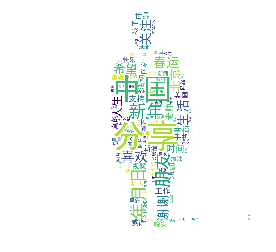

In [ ]:
image_mask='pic/man1.jpg'
mask = np.array(Image.open(image_mask))
w = wordcloud.WordCloud(width = 5000, height = 1000,\
                        background_color = "white",mask =mask,\
                        font_path='font/simhei.ttf',)
w.generate(m_tag)
w.to_file("pic/man_word.png")

#画图
plt.imshow(w)
plt.axis('off')
plt.show()

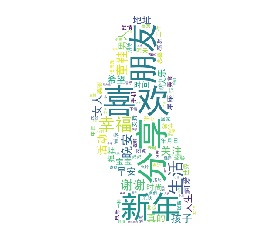

In [ ]:
image_mask='pic/woman.jpg'
mask = np.array(Image.open(image_mask))
w1 = wordcloud.WordCloud(width = 5000, height = 1000,\
                        background_color = "white",mask =mask,\
                        font_path='font/simhei.ttf',)
w1.generate(f_tag)
w1.to_file("pic/woman_word.png")

#画图
plt.imshow(w1)
plt.axis('off')
plt.show()

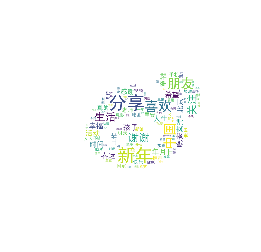

In [ ]:
image_mask='pic/微博.jpg'
mask = np.array(Image.open(image_mask))
w = wordcloud.WordCloud(width = 5000, height = 1000,\
                        background_color = "white",mask =mask,\
                        font_path='font/simhei.ttf',)
w.generate(v_tag)
w.to_file("pic/v_word.png")

#画图
plt.imshow(w)
plt.axis('off')
plt.show()

In [ ]:
df.created_at.head(10)

0    2012-01-03 01:15:36
1    2012-01-03 01:12:55
2    2012-01-03 01:09:54
3    2012-01-03 01:08:45
4    2012-01-03 00:54:07
5    2012-01-03 00:38:10
6    2012-01-02 22:58:52
7    2012-01-02 22:51:06
8    2012-01-02 20:46:42
9    2012-01-02 20:43:18
Name: created_at, dtype: object

In [ ]:
#将created_at转成时间序列
time_data=pd.to_datetime(df['created_at'],format='%Y-%m-%d')
df['time']=time_data

In [ ]:
df.image.value_counts()

0    2703461
1    1074316
Name: image, dtype: int64

In [ ]:
#将时间序列作为索引并升序排序
date_index=df.set_index(['time'])
date_index=date_index.sort_index(ascending=True)
date_index.head(5)

,mid,retweeted_status_mid,uid,retweeted_uid,source,image,text,geo,created_at,deleted_last_seen,permission_denied,seg_words
time,,,,,,,,,,,,
2012-01-02,mrMzmTTKEr,NaN,uYC31ZOPQ,NaN,E.U.B排期表,1,超黄历之年月日星期一今日黄历宜拜晚年宜餐餐加俩汤宜报平安宜领养高帅富宜讲字宜培养日记习惯忌唠...,NaN,2012-01-02 00:00:00,NaN,NaN,超 黄历 之 年月日 星期一 今日 黄历 宜拜 晚年 宜餐 餐加 俩 汤宜 报平安 宜 领养...
2012-01-02,mNlgGtXmDn,m7dA1s3Bmf,uKPKUYBUG,NaN,皮皮时光机,0,如果你结婚你就会后悔如果你不结婚你也会后悔无论你结婚还是不结婚你都会后悔,NaN,2012-01-02 00:00:00,NaN,NaN,如果 你 结婚 你 就 会 后悔 如果 你 不 结婚 你 也 会 后悔 无论 你 结婚 还是...
2012-01-02,mwQFQimyT9,NaN,uBK1PEYJF,NaN,内容库定时发送,1,带着目标上路目标是一盏明灯照亮了属于你的生命目标是一个路牌在迷路时为你指明方向目标是一支火把...,NaN,2012-01-02 00:00:00,NaN,NaN,带 着 目标 上路 目标 是 一盏 明灯 照亮 了 属于 你 的 生命 目标 是 一个 路牌...
2012-01-02,m2rV6SiJKt,mHBe4MxxTU,uDZT41DBW,u351ZG1QS,新浪微博,0,金奖,NaN,2012-01-02 00:00:00,NaN,NaN,金奖
2012-01-02,mH44vV0phq,NaN,uNEGBDSYK,NaN,新浪微博,0,好累好想睡了,NaN,2012-01-02 00:00:00,NaN,NaN,好累 好 想 睡 了


In [ ]:
date_index.index

DatetimeIndex(['2012-01-02 00:00:00', '2012-01-02 00:00:00',
               '2012-01-02 00:00:00', '2012-01-02 00:00:00',
               '2012-01-02 00:00:00', '2012-01-02 00:00:00',
               '2012-01-02 00:00:00', '2012-01-02 00:00:00',
               '2012-01-02 00:00:00', '2012-01-02 00:00:00',
               ...
               '2012-01-08 23:59:59', '2012-01-08 23:59:59',
               '2012-01-08 23:59:59', '2012-01-08 23:59:59',
               '2012-01-08 23:59:59', '2012-01-08 23:59:59',
               '2012-01-08 23:59:59', '2012-01-08 23:59:59',
               '2012-01-08 23:59:59', '2012-01-08 23:59:59'],
              dtype='datetime64[ns]', name='time', length=3777777, freq=None)

In [ ]:
date_1=list(date_index['2012-01-02':'2012-01-04']['seg_words'])
date_2=list(date_index['2012-01-05':'2012-01-06']['seg_words'])
date_3=list(date_index['2012-01-07':'2012-01-08']['seg_words'])
print(len(date_1),len(date_2),len(date_3))

1595372 1216178 966227


In [ ]:

n_features=1000
tf_vectorizer_1=CountVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words=stoplist,
                                max_df=0.5,
                                min_df=10)
tf_vectorizer_2=CountVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words=stoplist,
                                max_df=0.5,
                                min_df=10)
tf_vectorizer_3=CountVectorizer(strip_accents='unicode',
                                max_features=n_features,
                                stop_words=stoplist,
                                max_df=0.5,
                                min_df=10)
tf_1=tf_vectorizer_1.fit_transform(date_1)
tf_2=tf_vectorizer_2.fit_transform(date_2)
tf_3=tf_vectorizer_3.fit_transform(date_3)
tf_1.shape

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2c', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'iii', 'isn', 'lex', 'li', 'll', 'mon', 'ng昉', 'null', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'zxfitl'] not in stop_words.
  sorted(inconsistent))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2c', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'iii', 'isn', 'lex', 'li', 'll', 'mon', 'ng昉', 'null', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'zxfitl'] not in stop_words.
  sorted(inconsistent))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklea

(1595372, 1000)

In [ ]:
from sklearn.externals import joblib
import pickle
tf_ModelPath='model/tf_model_1.pkl'
feature_path='feature/feature_1.pkl'
joblib.dump(tf_vectorizer_1,tf_ModelPath )
with open(feature_path, 'wb') as fw:
    pickle.dump(tf_vectorizer_1.vocabulary_, fw)

In [ ]:
tf_ModelPath='model/tf_model_2.pkl'
feature_path='feature/feature_2.pkl'
joblib.dump(tf_vectorizer_2,tf_ModelPath )
with open(feature_path, 'wb') as fw:
    pickle.dump(tf_vectorizer_2.vocabulary_, fw)

In [ ]:
tf_ModelPath='model/tf_model_3.pkl'
feature_path='feature/feature_3.pkl'
joblib.dump(tf_vectorizer_3,tf_ModelPath )
with open(feature_path, 'wb') as fw:
    pickle.dump(tf_vectorizer_3.vocabulary_, fw)

In [ ]:
tf_vectorizer_3.get_feature_names()

In [ ]:
n_topics=5
lda_1=LatentDirichletAllocation(n_topics=n_topics,
                                #learning_method='batch',
                                learning_method='online',
                                max_iter=20,
                                learning_offset=50.,
                                random_state=0,
                                batch_size=128,
                                verbose=1)
lda_2=LatentDirichletAllocation(n_topics=n_topics,
                                #learning_method='batch',
                                learning_method='online',
                                max_iter=20,
                                learning_offset=50.,
                                random_state=0,
                                batch_size=128,
                                verbose=1)  
lda_3=LatentDirichletAllocation(n_topics=n_topics,
                                #learning_method='batch',
                                learning_method='online',
                                max_iter=20,
                                learning_offset=50.,
                                random_state=0,
                                batch_size=128,
                                verbose=1)                          

In [ ]:
lda_1.fit(tf_1)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [ ]:
joblib.dump(lda_1,"model/lda1_model.pkl")

['model/lda1_model.pkl']

In [ ]:
lda_2.fit(tf_2)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [ ]:
joblib.dump(lda_2,"model/lda2_model.pkl")

['model/lda2_model.pkl']

In [ ]:
lda_3.fit(tf_3)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20


In [ ]:
joblib.dump(lda_3,"model/lda3_model.pkl")

In [ ]:
lda_1=joblib.load("model/lda1_model.pkl")
lda_2=joblib.load("model/lda2_model.pkl")
lda_3=joblib.load("model/lda3_model.pkl")

In [ ]:
n_top_words=20
tf_feature_names_1=tf_vectorizer_1.get_feature_names()
print_topic(lda_1,tf_feature_names_1,n_top_words)

Topic0
希望 人生 感觉 发现 快乐 回家 一年 生命 美丽 事情 老师 咖啡 开心 二次元 感谢 不想 心情 元旦 登场 告诉
Topic1
真的 支持 活动 地址 明天 北京 电影 香港 不错 可爱 期待 加油 上海 好好 广州 成功 努力 深圳 调查 投票
Topic2
喜欢 中国 关注 改变 一种 谢谢 想要 今晚 永远 感受 分享 环境 美国 图片 简单 公司 所有人 收藏 这是 心态
Topic3
生活 朋友 吴奇隆 世界 好多 幸福 開始 還有 穿穿 成果 花絮 起來 雜誌 熊貓 不斷 族人 脫脫 戰神 愛特 时间
Topic4
男人 女人 新年 孩子 分享 东西 推荐 手机 终于 有人 坤哥 视频 一点 时尚 晚上 劳资 分钟 音乐 值得 新浪



In [ ]:
n_top_words=20
tf_feature_names_2=tf_vectorizer_1.get_feature_names()
print_topic(lda_2,tf_feature_names_2,n_top_words)

Topic0
命运 真的 木有 用千本 本来 感到 负责 有空 惊喜 一段 生日 双子 熟悉 恋爱 原來 女孩 事件 放入 更好 选择
Topic1
天蝎座 小编 市民 一生 父亲 人气 妈妈 尊重 善良 国际 友情 我們 微笑 美女 這個 世界 做人 美丽 事业 担心
Topic2
世上 收获 春节 口味 女儿 东莞 什麼 感动 迪拜 不斷 形象 怎麼 创新 环境 大学 领导 白羊座 面对 分秒 参与
Topic3
公司 思考 几天 刷屏 推荐 明星 不错 努力 刺激 香港 方向 名字 电影 困难 一家 女子 手机 明天 管理 年月日
Topic4
电话 严肃 明明 深圳 全国 流行 图片 老师 新鲜 感覺 功能 今日 某人 记得 好玩 特色 生命 太阳 神马 近日



In [ ]:
n_top_words=20
tf_feature_names_3=tf_vectorizer_3.get_feature_names()
print_topic(lda_3,tf_feature_names_3,n_top_words)

Topic0
父母 健康 世界 祝福 心愿 人生 儿女 孩子 电影 明天 谢谢 好好 简单 我們 时尚 晚安 真的 天下 女孩 记得
Topic1
喜欢 分享 关注 推荐 回家 不错 北京 手机 新年 图片 开心 终于 心情 今晚 视频 新浪 分钟 妈妈 赶紧 童鞋
Topic2
幸福 朋友 生活 希望 时间 一种 快乐 香港 永远 发现 东西 感觉 老师 努力 两个 选择 成功 地方 美国 生命
Topic3
女人 加油 男人 真的 公司 支持 柯达 地址 定义 蚕食 期待 活动 一家 可爱 胶片 数码 事情 市场 好消息 早就
Topic4
中国 星座 爱情 工作 恭喜 结婚 有人 旅行 建议 春运 包括 婚姻 不想 最终 高智商 那种 一年 天蝎座 公认 狮子座

